### Linear Regression
<p>-finds the best linear fit for a dataset. <br> 
-to use linear regression, we assume the following assumptions about the data:<br>
&emsp; - linearity<br>
&emsp; - independence<br>
&emsp; - normality<br>
&emsp; - homoskedasticity<br>

</p>
<p>-a linear regression model can be evaluated by:<br> 
&emsp; - Mean Absolute Error (MAE)<br> 
&emsp;- Mean Squared Error (MSE): helps in punishing large errors. It's also differentiable<br> 
&emsp;- Root Mean Squared Error (RMSE)<br> 
&emsp;- Coefficient of Determination </p>
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

### Dataset 
<p>Link: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand</p>
Attribute names can be found in the link. 

In [2]:
df = pd.read_csv("SeoulBikeData.csv")
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
# we are only going to use the bike_count for a specific hour, e.g. 12
df = df[df["Hour"] == 12]

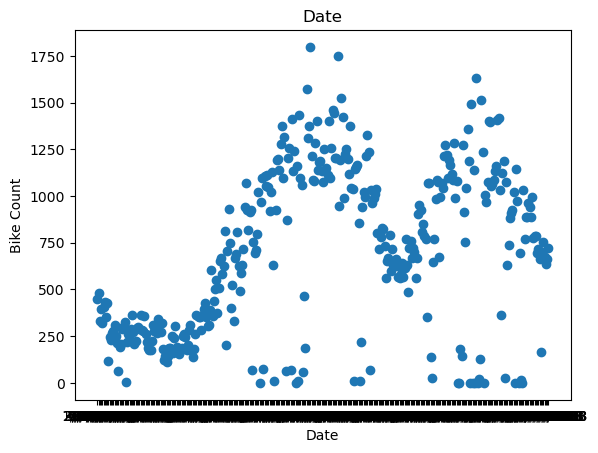

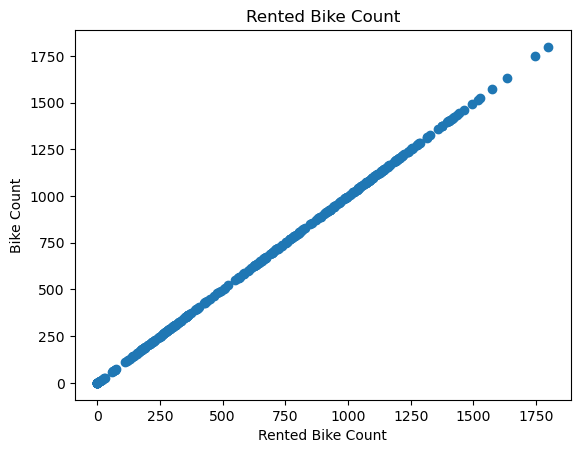

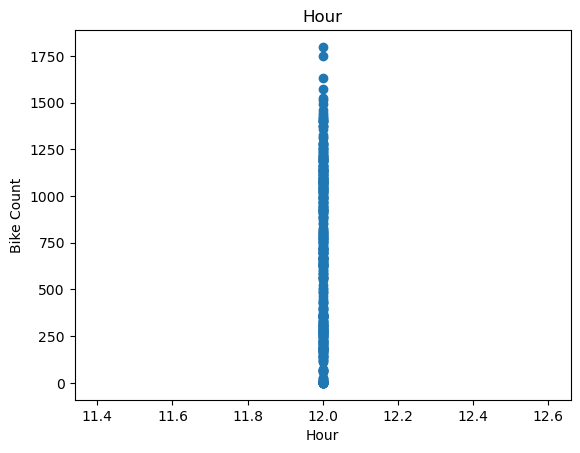

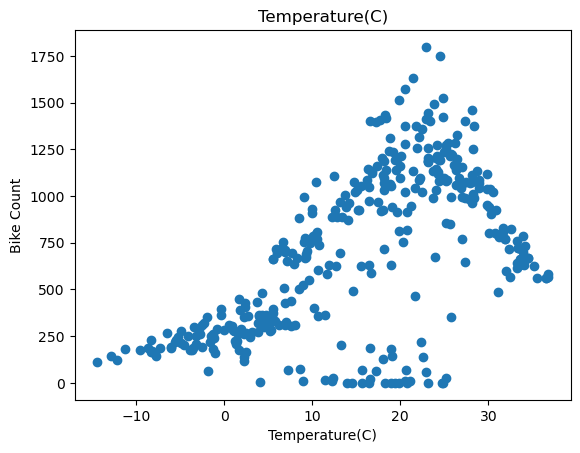

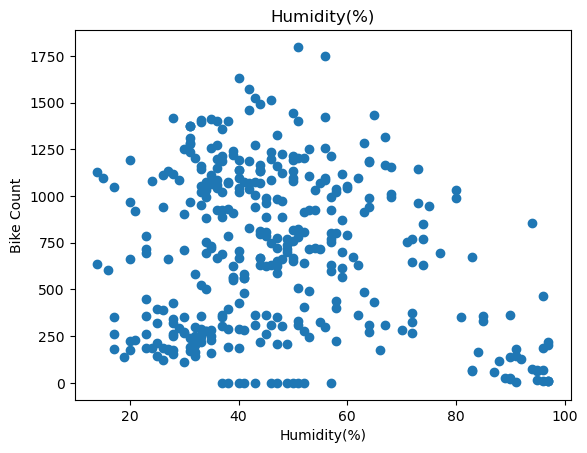

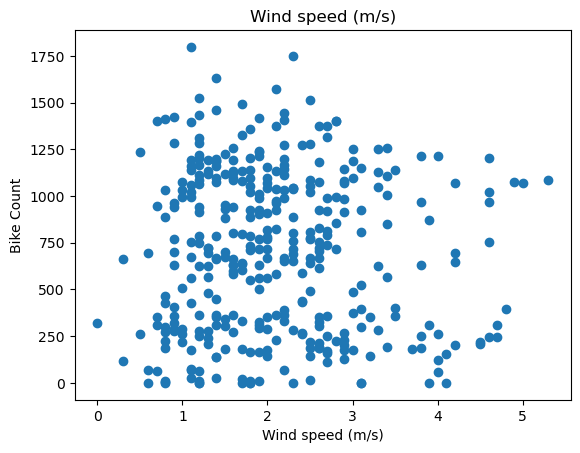

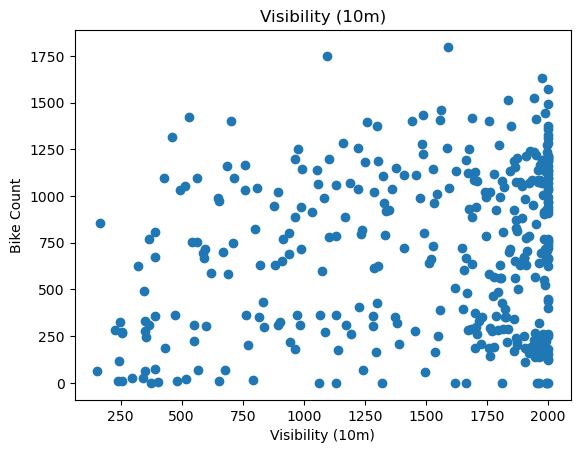

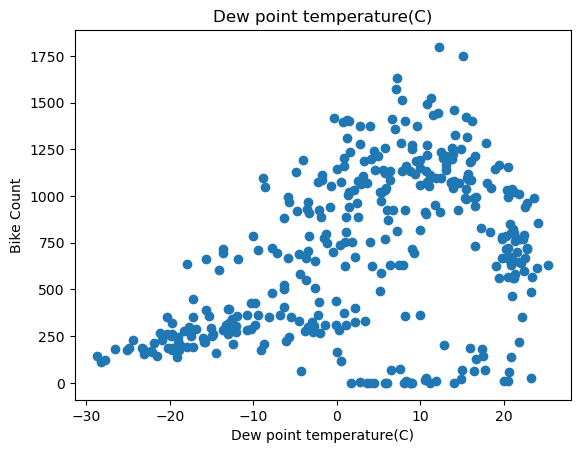

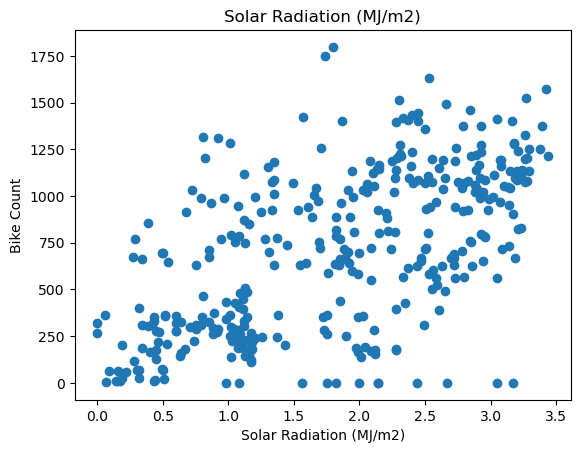

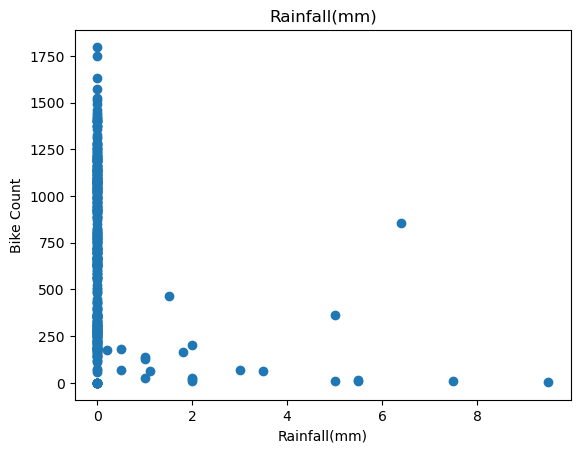

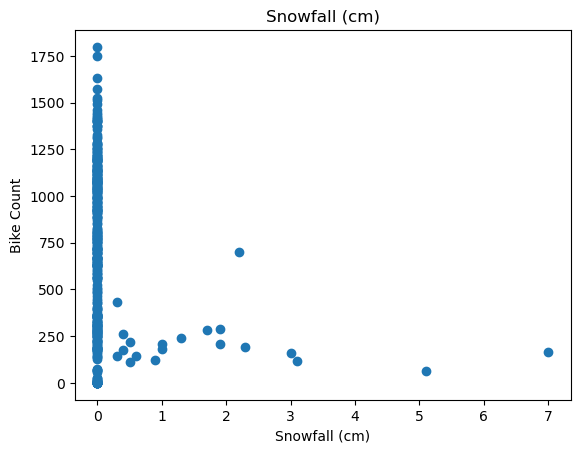

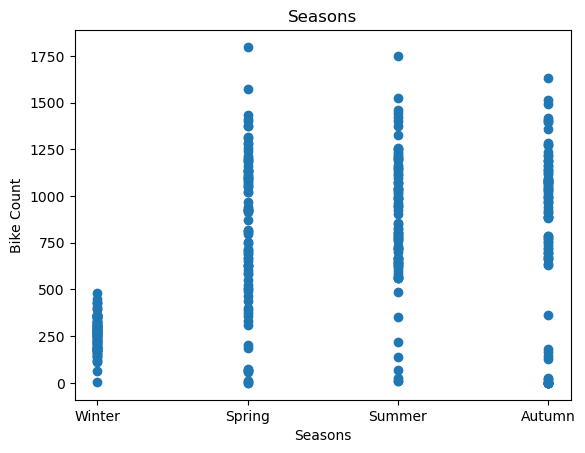

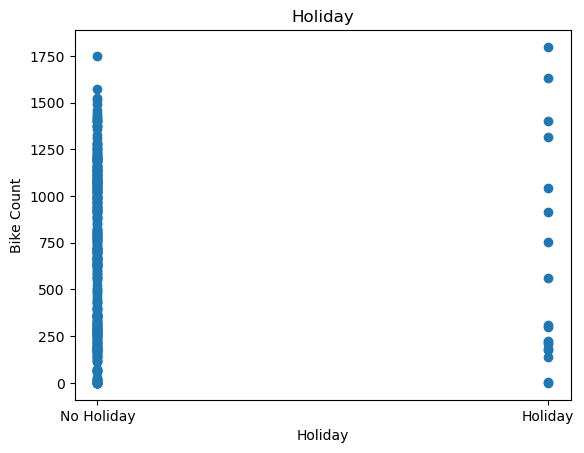

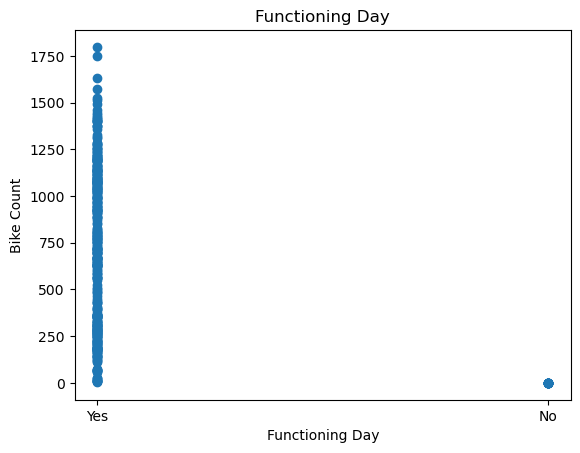

In [4]:
#ploting
for label in df.columns:
    plt.scatter(df[label], df["Rented Bike Count"])
    plt.title(label)
    plt.ylabel("Bike Count")
    plt.xlabel(label)
    plt.show()

In [5]:
# now we only select linear columns with the help of the above plot and get the rid of the other
# humidity could probably have an inverse relationship with the target. Rain and snow are kept as in the video
df = df.drop(["Date", "Hour", "Wind speed (m/s)", "Visibility (10m)", "Seasons", "Holiday", "Functioning Day"], axis=1)
df.head()

,Rented Bike Count,Temperature(C),Humidity(%),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


### Train/valid/test datasets

In [38]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\sayed\anaconda3\envs\cuda\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [71]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            x = dataframe[x_labels].values.reshape(-1, 1) # the reason for [0] is to only take the values and not the column name
        else:
            x = dataframe[x_labels].values # .values returns a numpy array
    y = dataframe[y_label].values.reshape(-1, 1) # we use values instead to 
    data = np.hstack((x, y))

    return data, x, y

In [72]:
# train, validation and test datasets
_, x_train_temp, y_train_temp = get_xy(train, "Rented Bike Count", x_labels=["Temperature(C)"])
_, x_val_temp, y_val_temp = get_xy(val, "Rented Bike Count", x_labels=["Temperature(C)"])
_, x_test_temp, y_test_temp = get_xy(test, "Rented Bike Count", x_labels=["Temperature(C)"])

In [73]:
# training the model
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [74]:
temp_reg.score(x_test_temp, y_test_temp) # it returns the R-squared value, which shows how well the model fits the data, the higher the better

0.37355364471967745

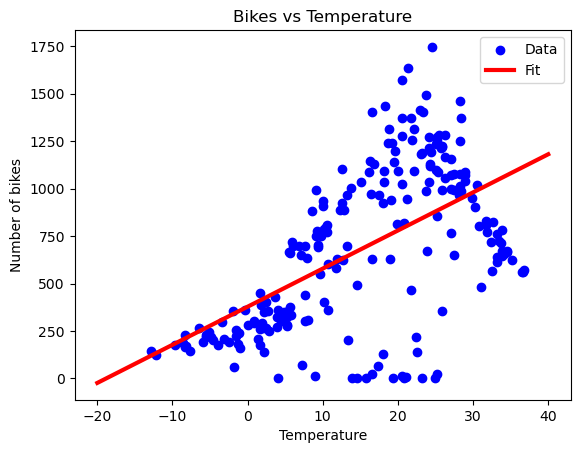

In [75]:
plt.scatter(x_train_temp, y_train_temp, label = "Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temperature")
plt.ylabel("Number of bikes")
plt.xlabel("Temperature")
plt.show()

### Multiple Linear Regression

In [165]:
# train, validation and test datasets
_, x_train_all, y_train_all = get_xy(train, "Rented Bike Count", x_labels=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val, "Rented Bike Count", x_labels=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, "Rented Bike Count", x_labels=df.columns[1:])

In [80]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [81]:
all_reg.score(x_test_all, y_test_all) # the result shows an imporovement. 

0.544189443602471

In [168]:
y_pred_lr = all_reg.predict(x_test_all)

### Regression with Neural Network with one feature

In [96]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None) #  creates a normalizer layer
temp_normalizer.adapt(x_train_temp.reshape(-1)) # uses the above-normalized layer to find the mean and variance of the data

#creating the model
temp_nn_model = tf.keras.Sequential([
    temp_normalizer, 
    tf.keras.layers.Dense(1)
])

#setting up the model by specifying the optimizer and the loss
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')


In [97]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp, 
    verbose=0,
    epochs=1000,
    validation_data=(x_val_temp, y_val_temp)
)

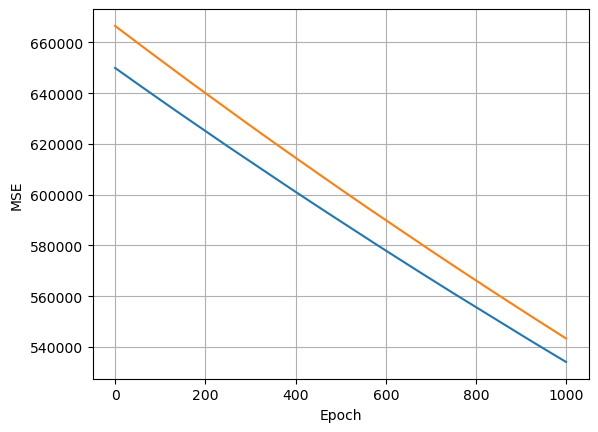

In [98]:
#plotting losses and accuracy over different epochs or training cycles
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.grid(True)
    
    plt.show()

plot_loss(history)  

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


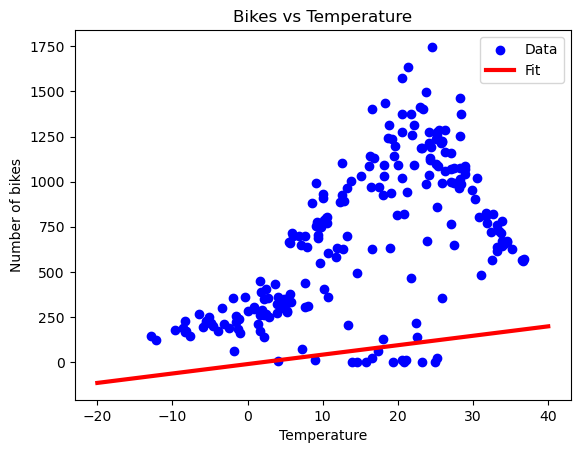

In [99]:
plt.scatter(x_train_temp, y_train_temp, label = "Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temperature")
plt.ylabel("Number of bikes")
plt.xlabel("Temperature")
plt.show()

### Regression with Neural Network with all features


In [143]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=None) #  creates a normalizer layer
all_normalizer.adapt(x_train_all.reshape(-1)) # uses the above-normalized layer to find the mean and variance of the data

#creating the model
all_nn_model = tf.keras.Sequential([
    all_normalizer, 
    tf.keras.layers.Dense(1),
])

#setting up the model by specifying the optimizer and the loss
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')


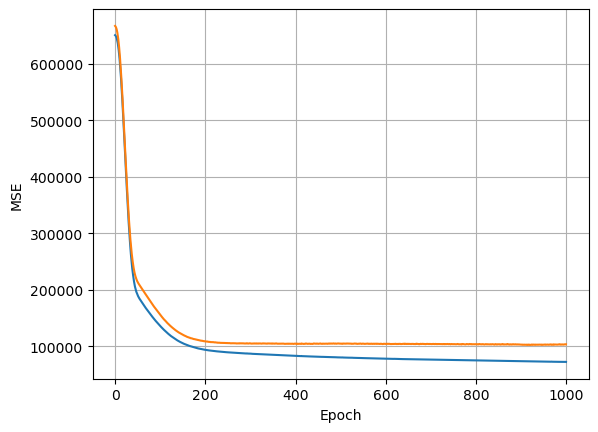

In [142]:
history = all_nn_model.fit(
    x_train_all, y_train_all, 
    verbose=0,
    epochs=1000,
    validation_data=(x_val_all, y_val_all)
)

plot_loss(history)  

### Neural Nets with one feature


In [131]:
#creating the model
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None) #  creates a normalizer layer
temp_normalizer.adapt(x_train_temp.reshape(-1)) # uses the above-normalized layer to find the mean and variance of the data

temp_nn_model = tf.keras.Sequential([
    temp_normalizer, 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

#setting up the model by specifying the optimizer and the loss
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')


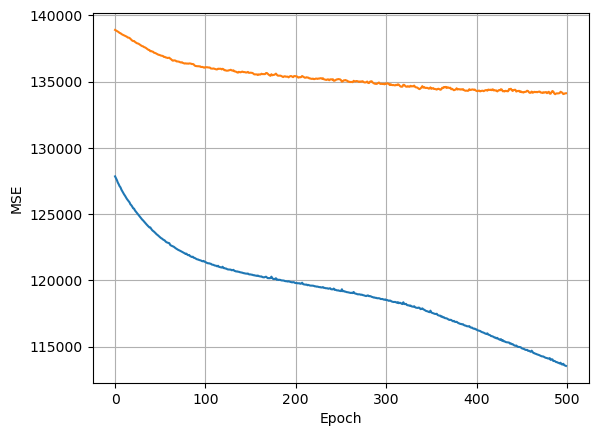

In [134]:
history = temp_nn_model.fit(
    x_train_temp, y_train_temp, 
    verbose=0,
    epochs=500,
    validation_data=(x_val_temp, y_val_temp)
)

plot_loss(history) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


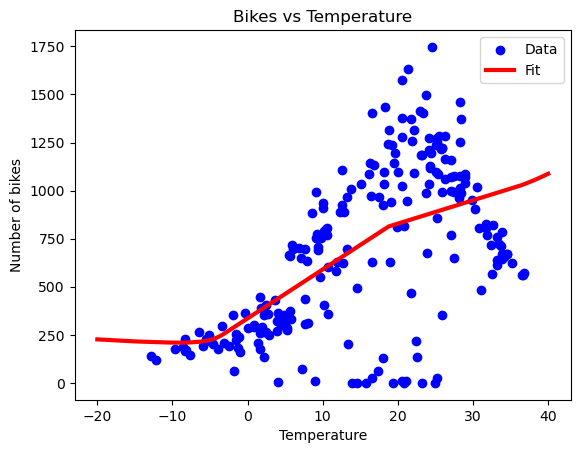

In [135]:
plt.scatter(x_train_temp, y_train_temp, label = "Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temperature")
plt.ylabel("Number of bikes")
plt.xlabel("Temperature")
plt.show()

As can be seen from the above line, neural network no longer create a straight line and the line is not linear

### Neural Nets with all the features


In [187]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1) #  creates a normalizer layer
all_normalizer.adapt(x_train_all) # uses the above-normalized layer to find the mean and variance of the data

#creating the model
all_nn_model = tf.keras.Sequential([
    all_normalizer, 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

#setting up the model by specifying the optimizer and the loss
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')


C:\Users\sayed\anaconda3\envs\cuda\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


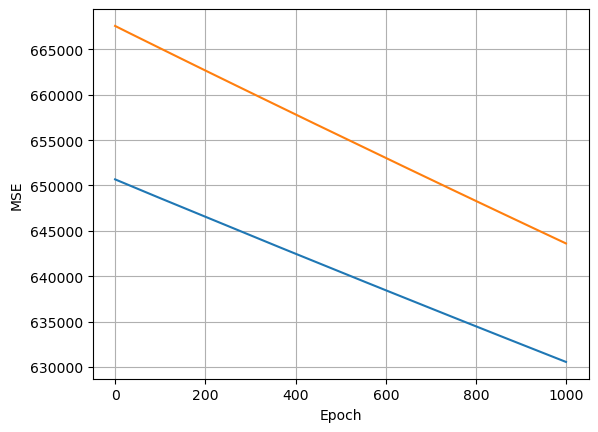

In [188]:
history = all_nn_model.fit(
    x_train_all, y_train_all, 
    validation_data=(x_val_all, y_val_all),
    verbose=0,
    epochs=1000
    
)

plot_loss(history) 

In [185]:
# calculating the Mean Squared Error for both linear reg and nn
y_pred_lr = all_reg.predict(x_test_all)
y_pred_nn = all_nn_model.predict(x_test_all)

def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

print(f"Linear regression MSE: {MSE(y_pred_lr, y_test_all)}")
print(f"NN model MSE: {MSE(y_pred_nn, y_test_all)}")

Linear regression MSE: 87880.54898216577
NN model MSE: 34299.50679051682


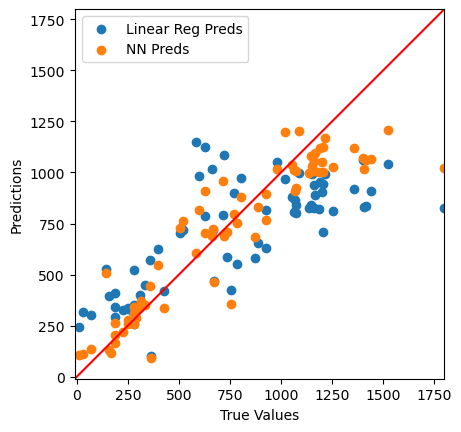

In [186]:
#ploting the predictions
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Linear Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [-10, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")

As the number of epochs insreases in the NN so does the accuracy